# Titanic Keras and Deep Learning

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

In [36]:
# Eğitim ve test verilerini yükleme
train = pd.read_csv("ttrain.csv")
test = pd.read_csv("ttest.csv")

In [37]:
print("Train veri boyutu:", train.shape)
print("Test veri boyutu:", test.shape)

Train veri boyutu: (891, 12)
Test veri boyutu: (418, 11)


In [38]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [40]:
# Age ve Fare sütunlarındaki eksikleri ortalama ile dolduralım
imputer = SimpleImputer(strategy='mean')
train["Age"] = imputer.fit_transform(train[["Age"]])
test["Age"] = imputer.transform(test[["Age"]])

test["Fare"] = imputer.fit_transform(test[["Fare"]])

In [41]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,29.699118,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,29.699118,0,0,359309,8.0500,NaN,S


In [42]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [44]:
# Embarked sütunundaki eksikleri en sık görülen değer ile dolduralım
imp_freq = SimpleImputer(strategy='most_frequent')
train["Embarked"] = imp_freq.fit_transform(train[["Embarked"]]).ravel()

In [45]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [46]:
X = train[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
y = train["Survived"]

In [47]:
# Kategorik değişkenleri sayısala çevirelim
X = pd.get_dummies(X, drop_first=True)
test_X = pd.get_dummies(test[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]], drop_first=True)

In [48]:
test_X = test_X.reindex(columns=X.columns, fill_value=0)

In [49]:
# Normalizasyon yapalim
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test_X)

In [50]:
# PCA yapalim
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
test_pca = pca.transform(test_scaled)

print("PCA sonrası boyut:", X_pca.shape[1])

PCA sonrası boyut: 7


In [51]:
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [52]:
# Derin Öğrenme Modelinin Kurulması
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\kosey\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6390 - loss: 0.6637 - val_accuracy: 0.6816 - val_loss: 0.6265
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7051 - loss: 0.5988 - val_accuracy: 0.7318 - val_loss: 0.5602
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7079 - loss: 0.5620 - val_accuracy: 0.7542 - val_loss: 0.5059
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7767 - loss: 0.5223 - val_accuracy: 0.7933 - val_loss: 0.4602
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7879 - loss: 0.4892 - val_accuracy: 0.7989 - val_loss: 0.4445
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7907 - loss: 0.4818 - val_accuracy: 0.7989 - val_loss: 0.4379
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8034 - loss: 0.4617 - val_accuracy: 0.7989 - val_loss: 0.4332
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7978 - loss: 0.4671 - val_accuracy: 0.8045 - 

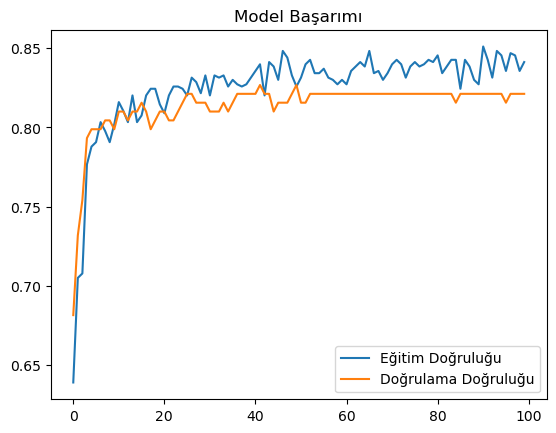

In [54]:
# Sonucu grafik olarak gorelim
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.legend()
plt.title("Model Başarımı")
plt.show()

In [55]:
# Test Verisi Tahmini ve Sonuç Dosyası
y_pred = (model.predict(test_pca) > 0.5).astype(int)

submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": y_pred.ravel()
})

submission.to_csv("submission.csv", index=False)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [58]:
# =====================================================
# Titanic - Deep Learning (Keras) Classification
# =====================================================

# 1. Kütüphaneler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 2. Veriyi Okuma
train = pd.read_csv("ttrain.csv")
test = pd.read_csv("ttest.csv")

# =====================================================
# 3. Eksik Verilerin Doldurulması (Data Imputation)
# =====================================================

# 'Age' - Ortalama ile dolduralım
imp_mean = SimpleImputer(strategy='mean')
train["Age"] = imp_mean.fit_transform(train[["Age"]])
test["Age"] = imp_mean.transform(test[["Age"]])

# 'Embarked' - En sık görülen değer ile dolduralım
imp_freq = SimpleImputer(strategy='most_frequent')
train["Embarked"] = imp_freq.fit_transform(train[["Embarked"]])
test["Embarked"] = imp_freq.transform(test[["Embarked"]])

# 'Fare' - Test setinde varsa boşlukları ortalama ile doldur
test["Fare"] = test["Fare"].fillna(test["Fare"].mean())

# =====================================================
# 4. Özellik Mühendisliği (Feature Engineering)
# =====================================================

# Title bilgisi çıkarma (Mr, Mrs, Miss vb.)
train["Title"] = train["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)
test["Title"] = test["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)

# Nadir ünvanları birleştir
for dataset in [train, test]:
    dataset["Title"] = dataset["Title"].replace(
        ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 
         'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset["Title"] = dataset["Title"].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

# Yeni özellikler
for dataset in [train, test]:
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1
    dataset["IsAlone"] = 1
    dataset.loc[dataset["FamilySize"] > 1, "IsAlone"] = 0

# =====================================================
# 5. Kategorik Değişkenlerin Kodlanması
# =====================================================

# Label Encoding
le = LabelEncoder()
for col in ["Sex", "Embarked", "Title"]:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

# Kullanılacak sütunlar
features = ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "IsAlone", "Title"]
X = train[features]
y = train["Survived"]
X_test_final = test[features]

# =====================================================
# 6. Normalizasyon (Standard Scaler)
# =====================================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test_final)

# =====================================================
# 7. Eğitim ve Test Ayrımı
# =====================================================
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# =====================================================
# 8. Derin Öğrenme Modeli (Keras Sequential)
# =====================================================
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# =====================================================
# 9. Modelin Eğitimi
# =====================================================
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

# =====================================================
# 10. Doğrulama Skoru
# =====================================================
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Accuracy: {val_acc:.4f}")

# =====================================================
# 11. Test Seti Tahminleri
# =====================================================
predictions = model.predict(X_test_scaled)
predictions = (predictions > 0.5).astype(int).flatten()

# =====================================================
# 12. Kaggle Submission Dosyası
# =====================================================
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": predictions
})

submission.to_csv("submission.csv", index=False)
print("submission.csv dosyası başarıyla oluşturuldu!")


ValueError: 2